In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
from function import *

In [3]:
df = make_data(dt=0.01, total_time = 50)

In [4]:
df

,u,time,f
0,0.000000e+00,0.00,0.000000
1,6.279052e-02,0.01,0.152729
2,1.253332e-01,0.02,0.272857
3,1.873813e-01,0.03,0.369560
4,2.486899e-01,0.04,0.449713
...,...,...,...
4996,-2.486899e-01,49.96,0.299277
4997,-1.873813e-01,49.97,0.338483
4998,-1.253332e-01,49.98,0.375216
4999,-6.279052e-02,49.99,0.410140


In [5]:
train = df.iloc[:int(len(df)*0.8)]
test = df.iloc[int(len(df)*0.8):]

In [6]:
train_x = train.iloc[:, :2].values
train_y = train.iloc[:, 2].values
test_x = test.iloc[:, :2].values
test_y = test.iloc[:, 2].values

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
sc_train_x = scaler.fit_transform(train_x)
sc_test_x = scaler.transform(test_x)

sc_train_y = scaler.fit_transform(train_y.reshape(-1, 1))
sc_test_y = scaler.transform(test_y.reshape(-1, 1))

In [10]:
import tensorflow as tf

if tf.config.list_physical_devices('GPU'):
    print("GPU is available")
else:
    print("GPU not available")


GPU not available


In [11]:
model = hysterisis_curve(sc_train_x, sc_train_y, sc_test_x, sc_test_y)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


In [12]:
model.dnn_fit(epochs=100, batch_size=1)

Epoch 1/100
4000/4000 [==============================] - 3s 561us/step - loss: 0.1856 - mse: 0.1856
Epoch 2/100
4000/4000 [==============================] - 2s 554us/step - loss: 0.1660 - mse: 0.1660
Epoch 3/100
4000/4000 [==============================] - 2s 551us/step - loss: 0.1646 - mse: 0.1646
Epoch 4/100
4000/4000 [==============================] - 2s 553us/step - loss: 0.1622 - mse: 0.1622
Epoch 5/100
4000/4000 [==============================] - 2s 548us/step - loss: 0.1627 - mse: 0.1627
Epoch 6/100
4000/4000 [==============================] - 2s 567us/step - loss: 0.1616 - mse: 0.1616
Epoch 7/100
4000/4000 [==============================] - 2s 542us/step - loss: 0.1615 - mse: 0.1615
Epoch 8/100
4000/4000 [==============================] - 2s 543us/step - loss: 0.1614 - mse: 0.1614
Epoch 9/100
4000/4000 [==============================] - 2s 580us/step - loss: 0.1609 - mse: 0.1609
Epoch 10/100
4000/4000 [==============================] - 2s 592us/step - loss: 0.1610 - mse: 0.1610

In [13]:
pred = model.dnn_predict()

32/32 [==============================] - 0s 516us/step


In [14]:
real_pred = scaler.inverse_transform(pred)

In [15]:
test_x[:,0]

array([-9.79717439e-15,  6.27905195e-02,  1.25333234e-01, ...,
       -1.25333234e-01, -6.27905195e-02,  1.96438672e-15])

In [45]:
real_pred.reshape(1,-1)[0]

array([-0.00260485,  0.03292199,  0.06830859, ..., -0.03451156,
       -0.02614823, -0.00315516], dtype=float32)

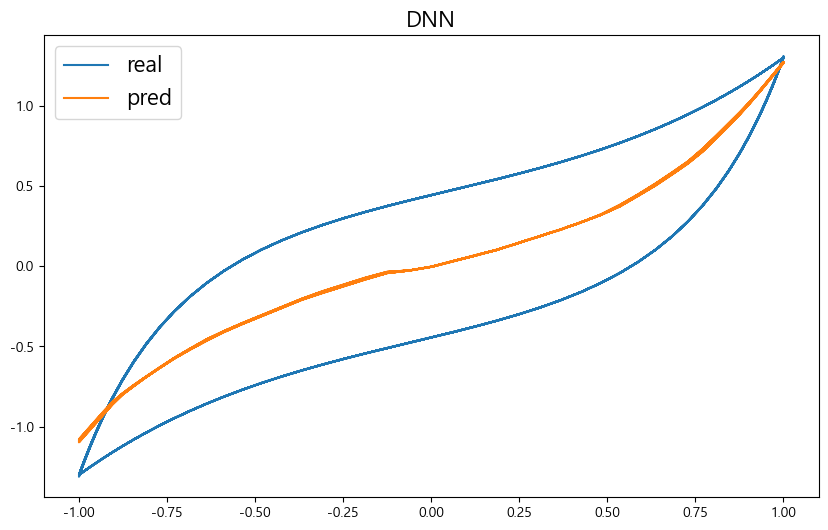

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(test_x[:,0], test_y, label='real')
plt.plot(test_x[:,0], real_pred.reshape(1,-1)[0], label='pred')
plt.title('DNN', fontsize = 16)
plt.legend(fontsize = 16)
plt.show()

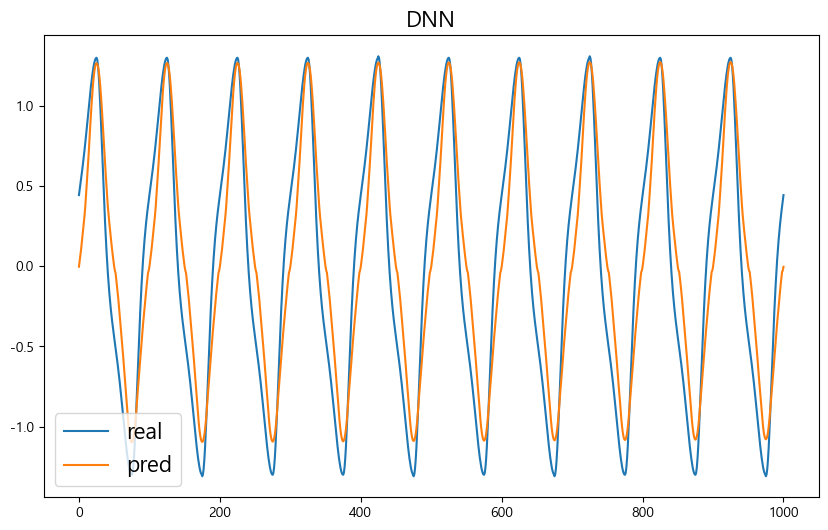

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(test_y, label = 'real')
plt.plot(real_pred.reshape(1,-1)[0], label = 'pred')
plt.title('DNN', fontsize = 16)
plt.legend(fontsize = 16)
plt.show()

In [18]:
lstm_history = model.lstm_fit(epochs=100, batch_size=1)

Epoch 1/100
4000/4000 [==============================] - 8s 2ms/step - loss: 0.2021 - mse: 0.2021
Epoch 2/100
4000/4000 [==============================] - 6s 1ms/step - loss: 0.1693 - mse: 0.1693
Epoch 3/100
4000/4000 [==============================] - 6s 1ms/step - loss: 0.1661 - mse: 0.1661
Epoch 4/100
4000/4000 [==============================] - 6s 1ms/step - loss: 0.1655 - mse: 0.1655
Epoch 5/100
4000/4000 [==============================] - 6s 1ms/step - loss: 0.1648 - mse: 0.1648
Epoch 6/100
4000/4000 [==============================] - 6s 1ms/step - loss: 0.1648 - mse: 0.1648
Epoch 7/100
4000/4000 [==============================] - 6s 2ms/step - loss: 0.1638 - mse: 0.1638
Epoch 8/100
4000/4000 [==============================] - 6s 1ms/step - loss: 0.1633 - mse: 0.1633
Epoch 9/100
4000/4000 [==============================] - 6s 2ms/step - loss: 0.1627 - mse: 0.1627
Epoch 10/100
4000/4000 [==============================] - 6s 1ms/step - loss: 0.1619 - mse: 0.1619
Epoch 11/100
4000/4

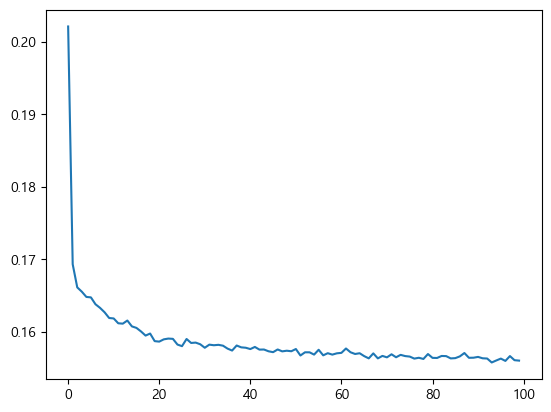

In [19]:
plt.plot(lstm_history.history.history['loss'])

In [20]:
lstm_pred = model.lstm_predict()

32/32 [==============================] - 0s 1ms/step


In [21]:
real_lstm_pred = scaler.inverse_transform(lstm_pred)

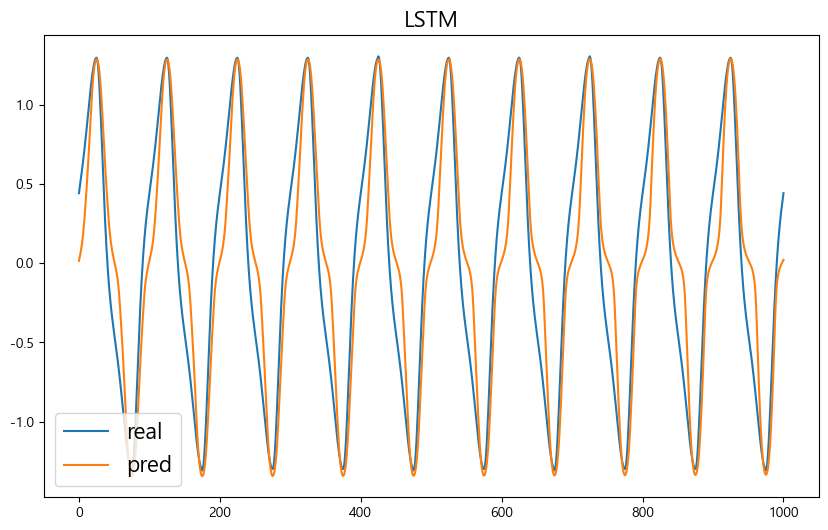

In [65]:
plt.figure(figsize = (10,6))
plt.title('LSTM', fontsize = 16)
plt.plot(test_y, label = 'real')
plt.plot(real_lstm_pred.reshape(1,-1)[0], label = 'pred')
plt.legend(fontsize = 16)
plt.show()

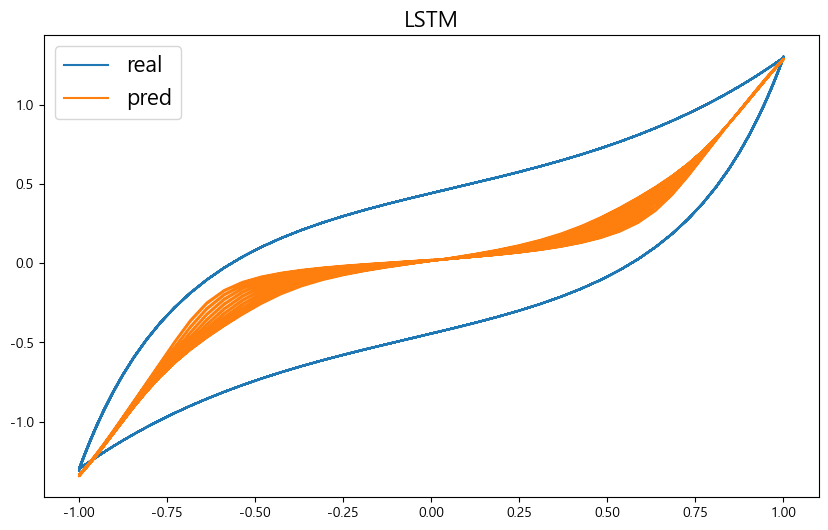

In [64]:
plt.figure(figsize = (10,6))
plt.title('LSTM', fontsize = 16)
plt.plot(test_x[:,0], test_y, label='real')
plt.plot(test_x[:,0], real_lstm_pred, label='pred')
plt.legend(fontsize = 16)
plt.show()

In [24]:
import scipy

In [25]:
class PINN_BoucWen(tf.keras.Model):
    def __init__(self, output_dim):
        super().__init__()
        self.hidden_layer_1 = tf.keras.layers.Dense(units=256, activation=tf.nn.relu)
        self.hidden_layer_2 = tf.keras.layers.Dense(units=128, activation=tf.nn.relu)
        self.output_layer_z = tf.keras.layers.Dense(units=1)  # To predict z
        self.output_layer_f = tf.keras.layers.Dense(units=output_dim)  # To predict F(t)

    def call(self, inputs):
        x = self.hidden_layer_1(inputs)
        x = self.hidden_layer_2(x)
        z = self.output_layer_z(x)
        f = self.output_layer_f(x)
        return z, f  # Return both z and F(t)

def compute_boucwen_dynamics(u, z, A, B, G, n):
    # No need to compute gradients here as TensorFlow can automatically compute them during training
    # z = tf.clip_by_value(z, -1e2, 1e2)
    Z_dot = A*u - B*(tf.abs(u)*tf.abs(z)**(n-1)*z) - G*u*tf.abs(z)**n
    return Z_dot

def boucwen_loss(y_true, y_pred_f, u, z_pred, A, B, G, n):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_true = tf.expand_dims(y_true, axis=-1)

    Z_dot_pred = compute_boucwen_dynamics(u, z_pred, A, B, G, n)
    
    # Compute physics_loss and data_loss
    physics_loss = tf.reduce_mean(tf.square(Z_dot_pred - z_pred))  # Z_dot_pred should be equal to z_pred according to the Bouc-Wen model
    data_loss = tf.reduce_mean(tf.square(y_true - y_pred_f))  # Predicted F(t) should be close to the true values

    return 0.5 * physics_loss + 0.5 * data_loss  

def train_step_boucwen(x_tr, y_tr, A, B, G, n):
    u = x_tr[:, 0]
    u = tf.convert_to_tensor(u)

    with tf.GradientTape(persistent=True) as tape:
        tape.watch(u)
        z_pred, y_pred_f = model_pinn_boucwen(x_tr, training=True)
        loss_value = boucwen_loss(y_tr, y_pred_f, u, z_pred, A, B, G, n)
    gradients = tape.gradient(loss_value, model_pinn_boucwen.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model_pinn_boucwen.trainable_variables))
    return loss_value


In [26]:
model_pinn_boucwen = PINN_BoucWen(output_dim=1)

In [27]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [28]:
x_tr = tf.convert_to_tensor(train_x)
y_tr = tf.convert_to_tensor(train_y)
x_te = tf.convert_to_tensor(test_x)
y_te = tf.convert_to_tensor(test_y)

In [29]:
x_tr = tf.cast(x_tr, dtype=tf.float32)
y_tr = tf.cast(y_tr, dtype=tf.float32)
x_te = tf.cast(x_te, dtype=tf.float32)
y_te = tf.cast(y_te, dtype=tf.float32)

In [30]:
epochs = 100

In [31]:
A = 3  
B = 5  
G = 1  
n = 2000

In [32]:
A = 0.1
B = 0.1
G = 0.1
n = 5

In [33]:
for epoch in range(epochs):
    loss_value = train_step_boucwen(x_tr, y_tr, A, B, G, n)
    print('Training loss at epoch %d: %s' % (epoch, float(loss_value)))

Training loss at epoch 0: 1.4326636791229248
Training loss at epoch 1: 0.5402542948722839
Training loss at epoch 2: 1.6127433776855469
Training loss at epoch 3: 0.7924833297729492
Training loss at epoch 4: 0.7261767983436584
Training loss at epoch 5: 0.6815654635429382
Training loss at epoch 6: 0.7722409963607788
Training loss at epoch 7: 0.7816560864448547
Training loss at epoch 8: 0.6689650416374207
Training loss at epoch 9: 0.599155068397522
Training loss at epoch 10: 0.5104421377182007
Training loss at epoch 11: 0.4023144245147705
Training loss at epoch 12: 0.32248133420944214
Training loss at epoch 13: 0.3199828267097473
Training loss at epoch 14: 0.3794258236885071
Training loss at epoch 15: 0.4294293522834778
Training loss at epoch 16: 0.4188264012336731
Training loss at epoch 17: 0.3513246774673462
Training loss at epoch 18: 0.2578287422657013
Training loss at epoch 19: 0.18706034123897552
Training loss at epoch 20: 0.1683066040277481
Training loss at epoch 21: 0.19250957667827

In [34]:
y_pred = model_pinn_boucwen(x_te)

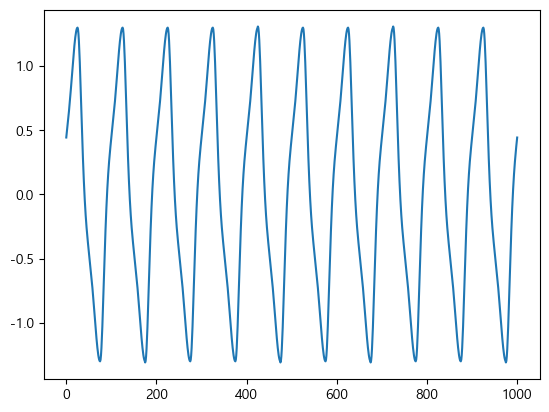

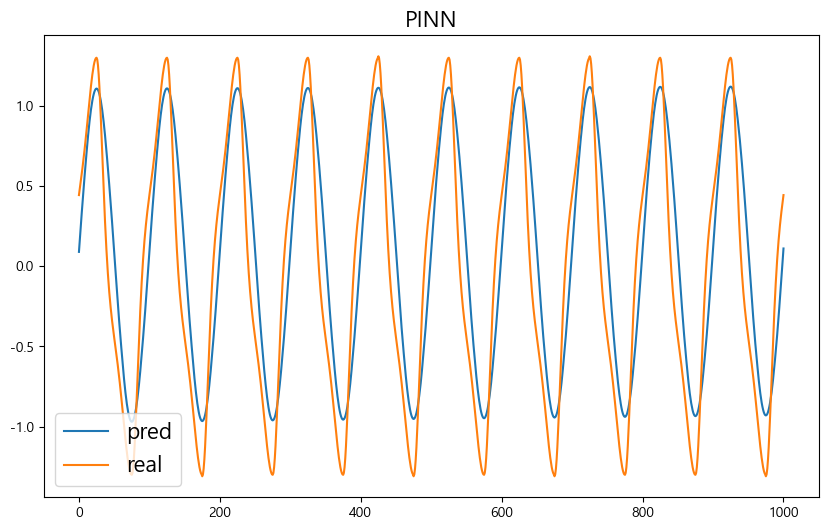

In [69]:
plt.figure(figsize = (10,6))
plt.plot(y_pred[1], label = 'pred')
plt.plot(y_te, label = 'real')
plt.title('PINN', fontsize = 16)
plt.legend(fontsize = 16)
plt.show()

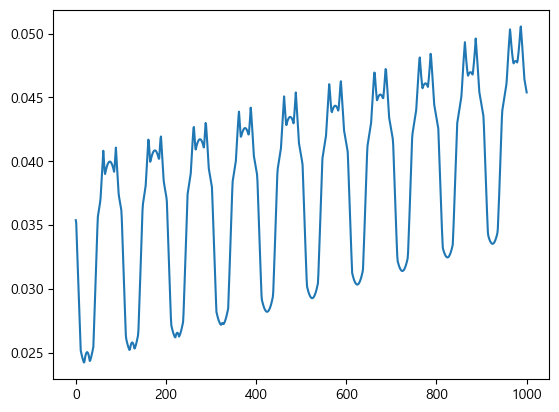

In [37]:
plt.plot(y_pred[0])

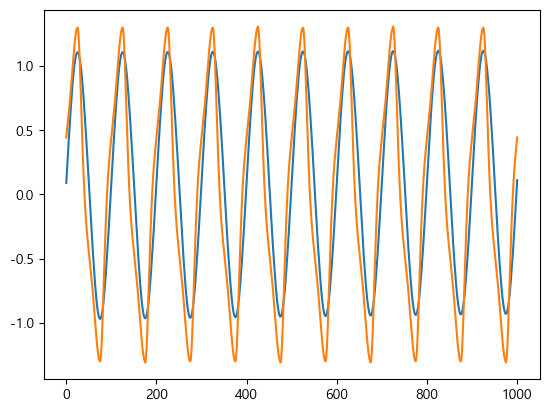

In [38]:
plt.plot(y_pred[1])
plt.plot(y_te)

In [39]:
y_pred[1]

<tf.Tensor: shape=(1001, 1), dtype=float32, numpy=
array([[ 0.08973708],
       [ 0.15284011],
       [ 0.21409863],
       ...,
       [-0.01500405],
       [ 0.04785123],
       [ 0.11095557]], dtype=float32)>

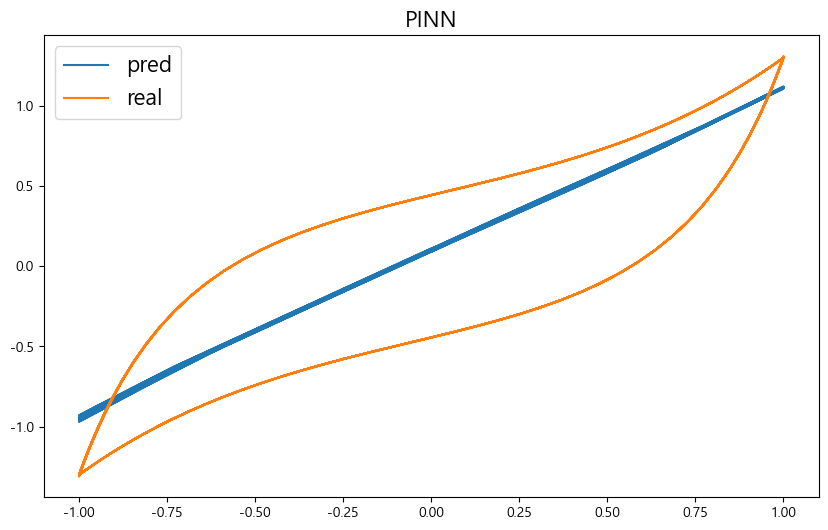

In [72]:
plt.figure(figsize = (10, 6))
plt.plot(test_x[:,0], y_pred[1], label = 'pred')
plt.plot(test_x[:,0], y_te, label = 'real')
plt.legend(fontsize = 16)
plt.title('PINN', fontsize= 16)
plt.show()